In [ ]:
%cd /content/drive/My Drive/Data Science/Shopee

/content/drive/My Drive/Data Science/Shopee


# Step 1 Understand your data

Normally a Subject Matter Expert (SME) would explain the data set to you. <br>
However in this case, they have a (csv/excel file) to explain the data
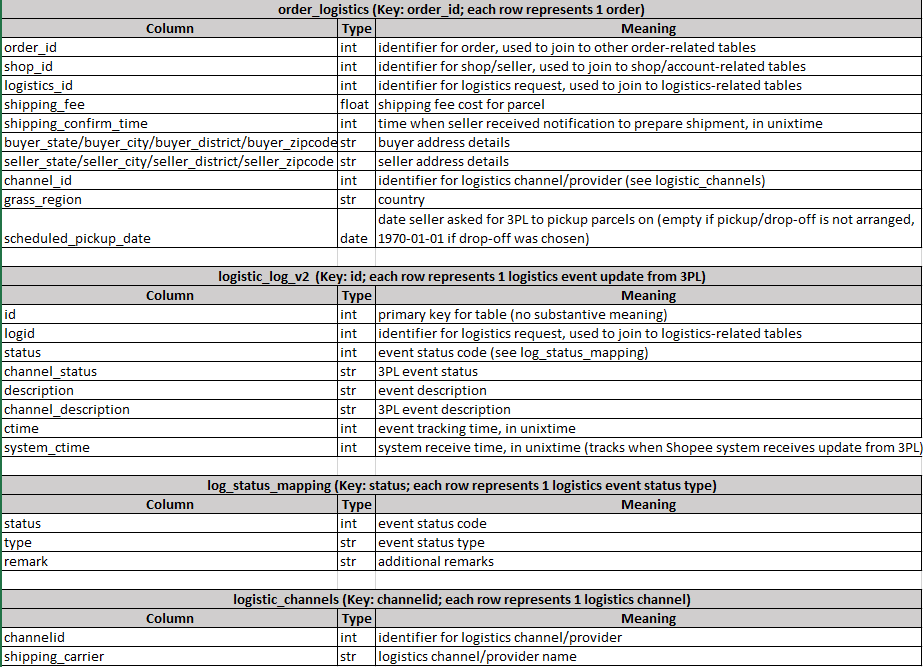

In [ ]:
import pandas as pd
pd.read_csv('log_status_mapping.csv', index_col='status')

,type,remark
status,,
-8,DELIVERY_FAILED,Indicates delivery failed
-6,PICKUP_FAILED,Indicates pickup failed
-3,REQUEST_CREATED,Indicates creation of logistics order/request
0,INITIAL,Indicates creation of logistics order/request
1,ORDER_INIT,Indicates creation of logistics order/request
2,ORDER_SUBMITTED,Indicates creation of logistics order/request
3,ORDER_CREATED,Indicates creation of logistics order/request
5,PICKUP_PENDING,Indicates pickup failed to happen
6,PICKED_UP,Indicates pickup of parcel by courier


# Step 2 Load Data set

## Load Logistics Log data

In [ ]:
import pandas as pd
df_log = pd.read_csv('MY_logistic_log_v2_2019-03.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Missing fields

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


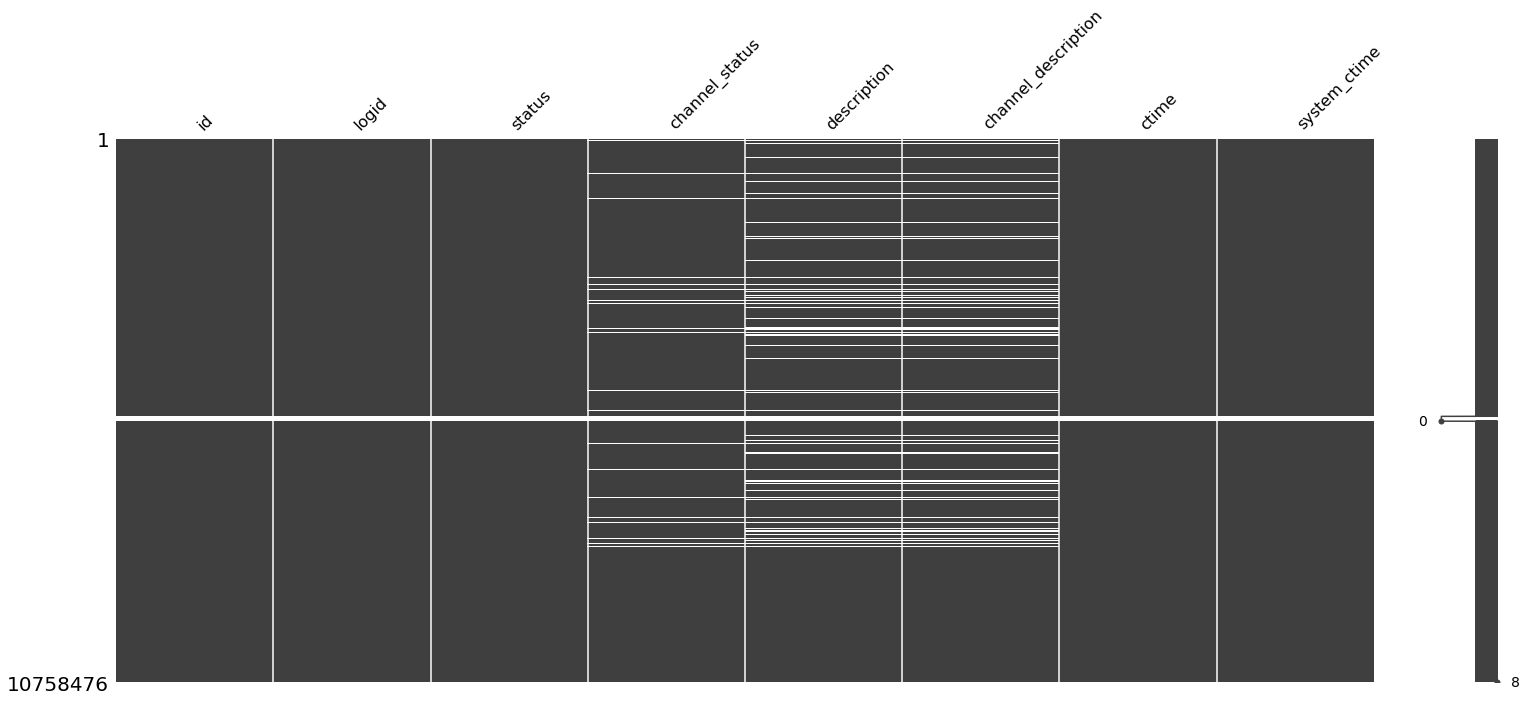

In [ ]:
import missingno as msno
msno.matrix(df_log)

Found multiple rows of empty fields therefore removing the entire rows

In [ ]:
df_log.dropna(how='all', inplace=True)

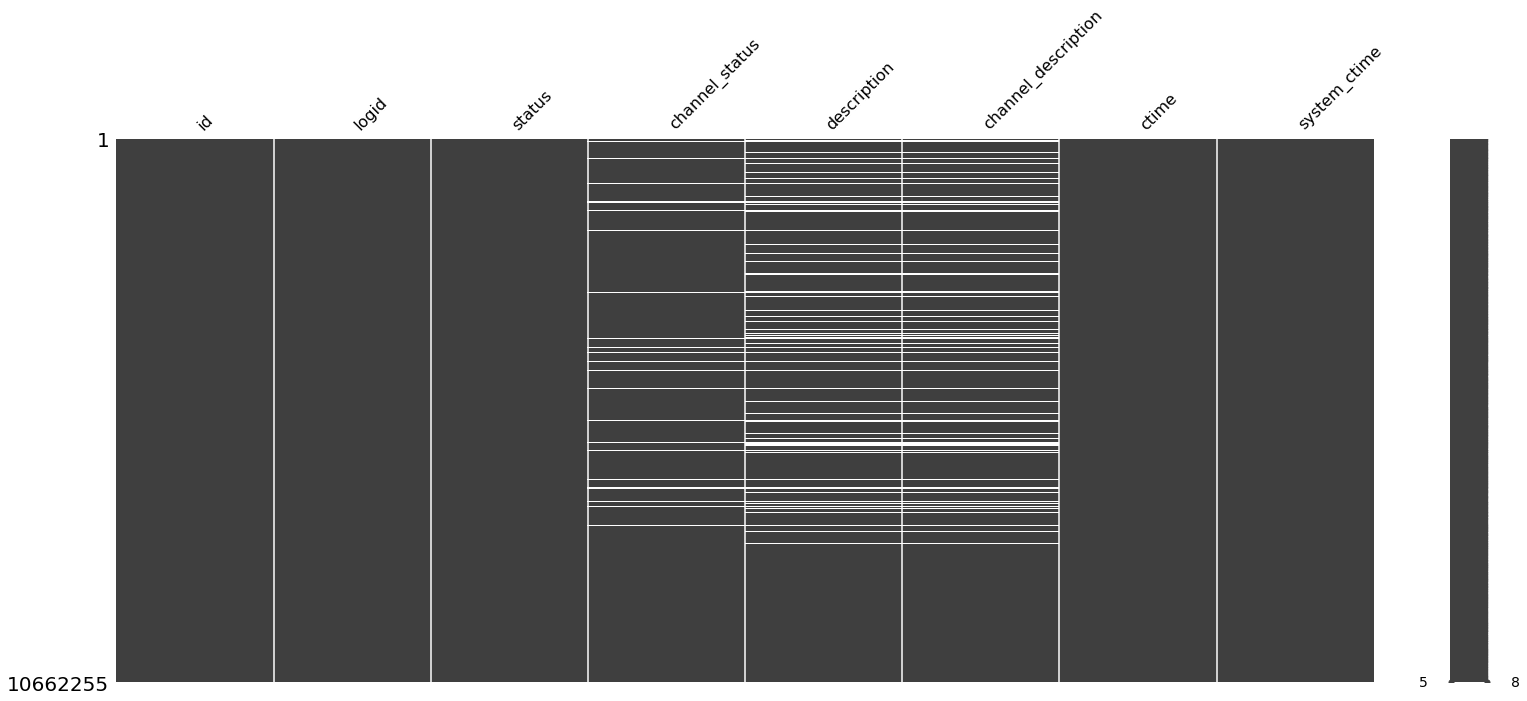

In [ ]:
import missingno as msno
msno.matrix(df_log)

## Incorrect Data format/type

In [ ]:
df_log.dtypes

id                     float64
logid                  float64
status                 float64
channel_status          object
description             object
channel_description     object
ctime                  float64
system_ctime           float64
dtype: object

IDs should be in integer format<br>
Time columns should be in datetime format

In [ ]:
df_log = df_log.astype(
    {
        'id': int,
        'logid': int,
        'channel_status': object,
        'description': object,
        'channel_description': object,
        'ctime': 'datetime64[s]',
        'system_ctime': 'datetime64[s]'
    }
)

## View and analyse Logistics log data

In [ ]:
df_log.head()

,id,logid,status,channel_status,description,channel_description,ctime,system_ctime
0,617906,1903018455382,1.0,S01,NaN,NaN,2019-02-28 22:37:42,2019-02-28 22:37:42
1,619956,1903018455382,6.0,EM005,Item dispatched out,Item dispatched out,2019-03-01 10:00:51,2019-03-02 01:33:42
2,619957,1903018455382,6.0,EM004,Item picked up,Item picked up,2019-03-01 10:31:42,2019-03-02 01:33:42
3,622060,1903018455382,6.0,EM012,Arrive at delivery facility at,Arrive at delivery facility at,2019-03-04 01:50:26,2019-03-04 03:49:27
4,625313,1903018455382,6.0,EM012,Arrive at delivery facility at,Arrive at delivery facility at,2019-03-05 00:52:56,2019-03-05 10:32:57


In [ ]:
# Data Overview
df_log.describe(include='all')

,id,logid,status,channel_status,description,channel_description,ctime,system_ctime
count,1.066226e+07,1.066226e+07,1.066226e+07,10193073,9204987,9195929,10662255,10662255
unique,NaN,NaN,NaN,61,537451,323044,2304645,1785996
top,NaN,NaN,NaN,EM012,Arrive at delivery facility at,Arrive at delivery facility at,2019-03-27 00:00:00,2019-03-12 19:03:15
freq,NaN,NaN,NaN,1265677,1265603,1265603,1250,106
first,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-01 04:01:32,2019-02-28 16:01:50
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-30 09:54:02,2019-07-30 09:54:02
mean,6.427715e+05,1.532473e+13,5.714755e+00,NaN,NaN,NaN,NaN,NaN
std,1.988292e+04,7.054384e+12,5.692107e+00,NaN,NaN,NaN,NaN,NaN
min,5.911810e+05,1.903018e+12,-8.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,6.280580e+05,1.903091e+13,6.000000e+00,NaN,NaN,NaN,NaN,NaN


## Load Order data

In [ ]:
df_orders = pd.read_csv('MY_order_logistics_2019-03.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Missing fields

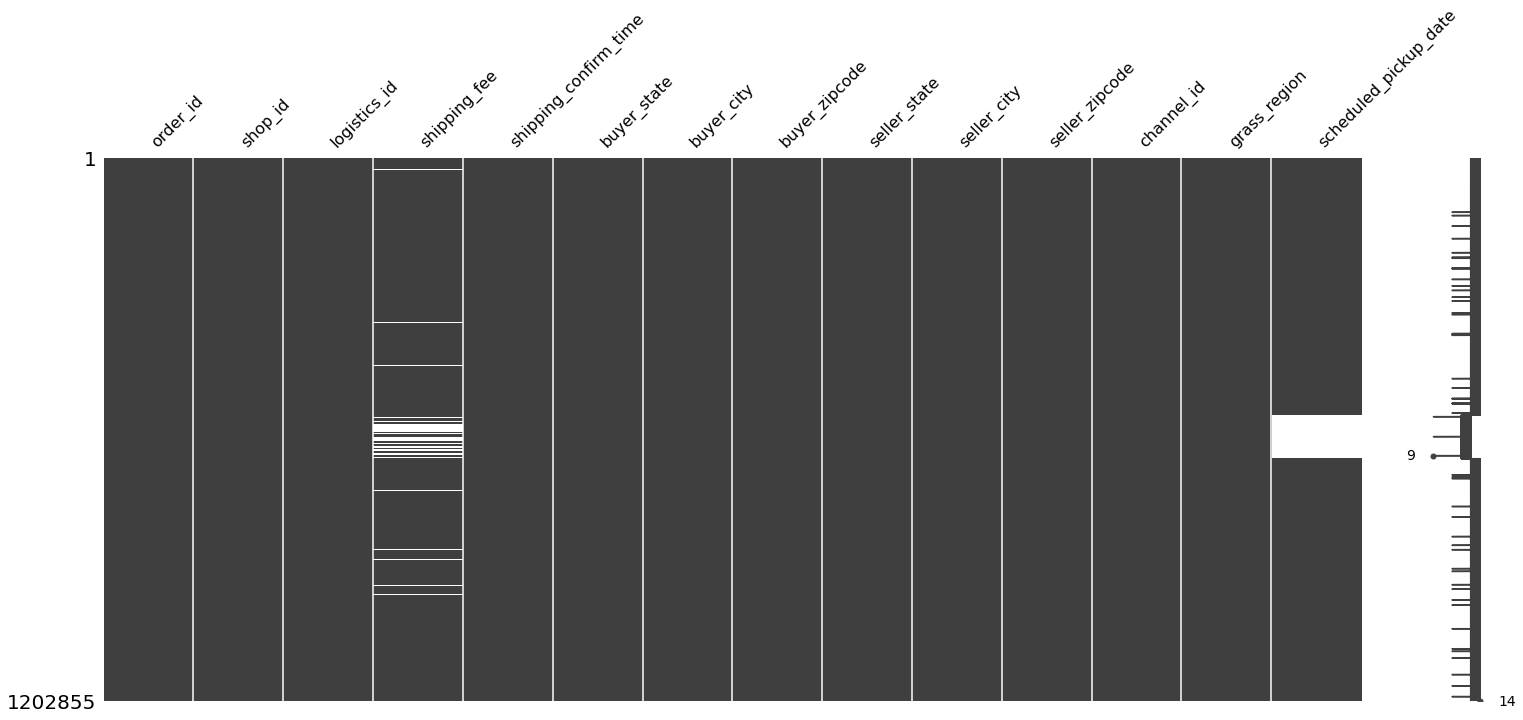

In [ ]:
import missingno as msno
msno.matrix(df_orders)

## Incorrect Data format/type

In [ ]:
df_orders.dtypes

order_id                   int64
shop_id                    int64
logistics_id               int64
shipping_fee             float64
shipping_confirm_time      int64
buyer_state               object
buyer_city                object
buyer_zipcode            float64
seller_state              object
seller_city               object
seller_zipcode           float64
channel_id                 int64
grass_region              object
scheduled_pickup_date     object
dtype: object

In [20]:
df_orders = df_orders.astype(
    {
        'shipping_confirm_time': 'datetime64[s]'
    }
)

## View and analyse Order data

In [21]:
df_orders.head()

,order_id,shop_id,logistics_id,shipping_fee,shipping_confirm_time,buyer_state,buyer_city,buyer_zipcode,seller_state,seller_city,seller_zipcode,channel_id,grass_region,scheduled_pickup_date
0,1106128862,61932465,1903018455382,5.04,2019-02-28 18:57:51,Perak,Ipoh,31350.0,Penang,Georgetown,10460.0,20007,MY,1970-01-01
1,1106120418,2944873,1903018463950,10.07,2019-02-28 18:45:21,Pahang,Genting Highlands,69000.0,Sarawak,Kuching,93350.0,20007,MY,1970-01-01
2,1106153829,5968635,1903018466463,5.04,2019-02-28 19:50:06,Selangor,Bukit Rotan,45700.0,Kedah,Kulim,9000.0,20007,MY,1970-01-01
3,1106154501,514221,1903018469476,5.04,2019-02-28 19:51:14,Johor,Johor Bahru,80100.0,Selangor,Others,43200.0,20007,MY,2019-03-01
4,1106122316,77992567,1903018472097,5.04,2019-02-28 18:48:28,Selangor,Subang Bestari,40150.0,Johor,Pasir Gudang,81700.0,20007,MY,1970-01-01


In [22]:
df_orders.describe(include='all')

,order_id,shop_id,logistics_id,shipping_fee,shipping_confirm_time,buyer_state,buyer_city,buyer_zipcode,seller_state,seller_city,seller_zipcode,channel_id,grass_region,scheduled_pickup_date
count,1.202855e+06,1.202855e+06,1.202855e+06,1.144234e+06,1202855,1202855,1202855,1.202855e+06,1202804,1202804,1.202804e+06,1.202855e+06,1202855,1106634
unique,NaN,NaN,NaN,NaN,844898,16,608,NaN,16,511,NaN,NaN,1,57
top,NaN,NaN,NaN,NaN,2019-03-27 14:53:12,Selangor,Shah Alam,NaN,Selangor,Others,NaN,NaN,MY,1970-01-01
freq,NaN,NaN,NaN,NaN,16,295688,36483,NaN,429517,129303,NaN,NaN,1202855,815334
first,NaN,NaN,NaN,NaN,2019-02-28 16:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-03-31 15:59:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.148490e+09,4.202977e+07,1.397516e+13,5.742641e+00,NaN,NaN,NaN,5.211042e+04,NaN,NaN,4.558389e+04,2.000781e+04,NaN,NaN
std,2.369802e+07,3.773437e+07,7.996857e+12,3.602194e+01,NaN,NaN,NaN,2.752903e+04,NaN,NaN,2.107831e+04,5.474713e+00,NaN,NaN
min,1.003976e+09,1.287400e+04,0.000000e+00,0.000000e+00,NaN,NaN,NaN,1.000000e+03,NaN,NaN,1.000000e+03,2.000700e+04,NaN,NaN
25%,1.127239e+09,1.149243e+07,1.903080e+12,5.040000e+00,NaN,NaN,NaN,3.135000e+04,NaN,NaN,3.240000e+04,2.000700e+04,NaN,NaN


# Step 3 

In [23]:
# Group by logid, status and take min to find first occurence of each status
min_ctime = df_log.groupby(['logid', 'status'])['ctime'].min()
min_ctime.head()

logid          status
1903018441237  1.0      2019-02-28 16:01:50
               6.0      2019-03-03 04:06:08
               8.0      2019-03-04 10:41:32
1903018442540  1.0      2019-02-28 16:03:02
               6.0      2019-03-01 03:18:18
Name: ctime, dtype: datetime64[ns]

In [24]:
log_pickup_ctime = min_ctime.loc[:, 6] # Status code 6 => pick up
log_pickup_ctime.name = 'pickup_ctime'

log_delivered_ctime = min_ctime.loc[:, 8] # Status code 8 => delivered
log_delivered_ctime.name = 'delivered_ctime'

log_firstatempt_ctime = min_ctime.loc[:, [7, 8]].reset_index().groupby('logid')['ctime'].min()
log_firstatempt_ctime.name = 'firstdelivery_ctime'

In [25]:
df_orders = df_orders.merge(
    log_pickup_ctime, left_on='logistics_id', right_on='logid', how='left'
).merge(
    log_delivered_ctime, left_on='logistics_id', right_on='logid', how='left'
).merge(
    log_firstatempt_ctime, left_on='logistics_id', right_on='logid', how='left'
)

In [26]:
df_orders['cdt_del'] = df_orders.delivered_ctime-df_orders.pickup_ctime
df_orders['cdt_firstdel'] = df_orders.firstdelivery_ctime-df_orders.pickup_ctime
df_orders[['cdt_del', 'cdt_firstdel']].describe()

,cdt_del,cdt_firstdel
count,1090073,1092140
mean,2 days 13:08:07.257843,2 days 08:15:19.998195
std,63 days 12:29:10.876278,64 days 17:00:50.587521
min,-5936 days +16:46:59,-5936 days +03:47:53
25%,0 days 21:43:05,0 days 21:26:56
50%,1 days 16:55:52,1 days 07:03:08
75%,2 days 19:01:57,2 days 15:20:10
max,5940 days 22:07:35,5940 days 22:07:35


In [27]:
from datetime import timedelta
df_orders[df_orders['cdt_del'] > timedelta(days=200)].head()

,order_id,shop_id,logistics_id,shipping_fee,shipping_confirm_time,buyer_state,buyer_city,buyer_zipcode,seller_state,seller_city,seller_zipcode,channel_id,grass_region,scheduled_pickup_date,pickup_ctime,delivered_ctime,firstdelivery_ctime,cdt_del,cdt_firstdel
4461,1173627160,18804054,19032713705750,5.04,2019-03-27 01:24:22,Selangor,Kajang,43000.0,Penang,Gelugor,11600.0,20007,MY,1970-01-01,2003-01-01 04:18:59,2019-03-28 08:00:36,2019-03-28 08:00:36,5930 days 03:41:37,5930 days 03:41:37
15415,1173556350,44255924,19032713691960,5.04,2019-03-27 01:03:49,Selangor,Bandar Sungai Long,43000.0,Kelantan,Machang,18500.0,20007,MY,1970-01-01,2003-01-01 04:16:51,2019-03-28 05:19:24,2019-03-28 05:19:24,5930 days 01:02:33,5930 days 01:02:33
16191,1182548744,43523333,19033114548852,5.04,2019-03-30 00:26:09,Selangor,Shah Alam,40300.0,Johor,Johor Bahru,81300.0,20007,MY,1970-01-01,2003-01-01 05:36:27,2019-04-01 03:46:11,2019-04-01 03:46:11,5933 days 22:09:44,5933 days 22:09:44
26127,1169860389,20402484,19032613262815,5.04,2019-03-25 23:52:52,Selangor,Kajang,43000.0,Selangor,Kajang,43000.0,20007,MY,2019-03-26,2003-01-01 04:16:32,2019-03-27 03:20:30,2019-03-27 03:20:30,5928 days 23:03:58,5928 days 23:03:58
27597,1188857041,1185351,19040114897198,5.04,2019-03-31 14:42:55,Selangor,Shah Alam,40200.0,Pahang,Mentakab,28400.0,20007,MY,1970-01-01,2003-01-01 04:39:06,2019-04-02 10:38:27,2019-04-02 10:38:27,5935 days 05:59:21,5935 days 05:59:21


In [28]:
# Remove negative/invalid CDT values
from datetime import timedelta
for col in ['cdt_del', 'cdt_firstdel']:
    df_orders[col] = df_orders.where(
        (df_orders[col] >= timedelta(days=0)) & 
        (df_orders[col] < timedelta(days=30)) & 
        (df_orders['pickup_ctime'] > df_orders['shipping_confirm_time'])
    )[col]
df_orders[['cdt_del', 'cdt_firstdel']].describe()

,cdt_del,cdt_firstdel
count,1087326,1089455
mean,2 days 01:04:26.686949,1 days 20:44:59.038079
std,1 days 17:38:39.380190,1 days 10:09:28.253127
min,0 days 00:00:04,0 days 00:00:04
25%,0 days 21:42:26,0 days 21:26:28
50%,1 days 16:52:15,1 days 06:52:55
75%,2 days 18:57:24,2 days 15:09:27
max,29 days 23:52:52,29 days 23:52:52


In [29]:
log_chl_grp = df_orders.groupby('channel_id')
log_chl_grp[['cdt_del', 'cdt_firstdel']].describe()

cdt_del  ...     cdt_firstdel
             count  ...              max
channel_id          ...                 
20007       975812  ... 29 days 22:50:01
20010        42860  ... 27 days 03:14:11
20011        58640  ... 29 days 23:52:52
20066        10014  ... 18 days 17:50:03

[4 rows x 16 columns]